<a href="https://colab.research.google.com/github/ugurcancakal/network_pytorch/blob/master/RNN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN in Pytorch

In [1]:
# @title Imports
import torch
import torch.nn as nn
from torch.autograd import Variable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [2]:
#@title Video: RNN Basics
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="ogZi5oIo4fI?t", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

Video available at https://youtube.com/watch?v=ogZi5oIo4fI?t


In [3]:
# @title Download Pictures and slides
import os, requests
fname = ['rnn_basic.png']
fname.append('rnn_hello.png')
fname.append('rnn_unfold_code.png')
fname.append('rnn_batch_code.png')
fname.append('rnn_teach.png')
fname.append('Lecture 12_ RNN.pptx')

id = ["1pQeafV2u5-d-bKBE33SLFGFsTvdUkOsk"]
id.append("1-SSa_jAQcguYfmYFlqN8uQTPIDdgRGQU")
id.append("1mhJKJvpjafLg97M-xNcijpI7LIykNr3B")
id.append("1hbatywSvdF-Scnne--rrGfvQezoHV5Ia")
id.append("1St_H-7rikjYlUkP1fKRREV4SAOvYApy-")
id.append("1rbwly3r7z7BD4ADvJ22ZhIy6Ow5xMyRB")

for j in range(len(id)):
  if not os.path.isfile(fname[j]):
    try:
      temp = id[j]
      !gdown --id $temp
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
  else:
    print("{} is already in the current directory".format(fname[j]))

Downloading...
From: https://drive.google.com/uc?id=1pQeafV2u5-d-bKBE33SLFGFsTvdUkOsk
To: /content/rnn_basic.png
100% 46.5k/46.5k [00:00<00:00, 80.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-SSa_jAQcguYfmYFlqN8uQTPIDdgRGQU
To: /content/rnn_hello.png
100% 70.9k/70.9k [00:00<00:00, 25.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mhJKJvpjafLg97M-xNcijpI7LIykNr3B
To: /content/rnn_unfold_code.png
100% 77.9k/77.9k [00:00<00:00, 61.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hbatywSvdF-Scnne--rrGfvQezoHV5Ia
To: /content/rnn_batch_code.png
100% 69.1k/69.1k [00:00<00:00, 25.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1St_H-7rikjYlUkP1fKRREV4SAOvYApy-
To: /content/rnn_teach.png
100% 78.0k/78.0k [00:00<00:00, 28.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rbwly3r7z7BD4ADvJ22ZhIy6Ow5xMyRB
To: /content/Lecture 12_ RNN.pptx
8.25MB [00:00, 129MB/s]


## Basic RNN

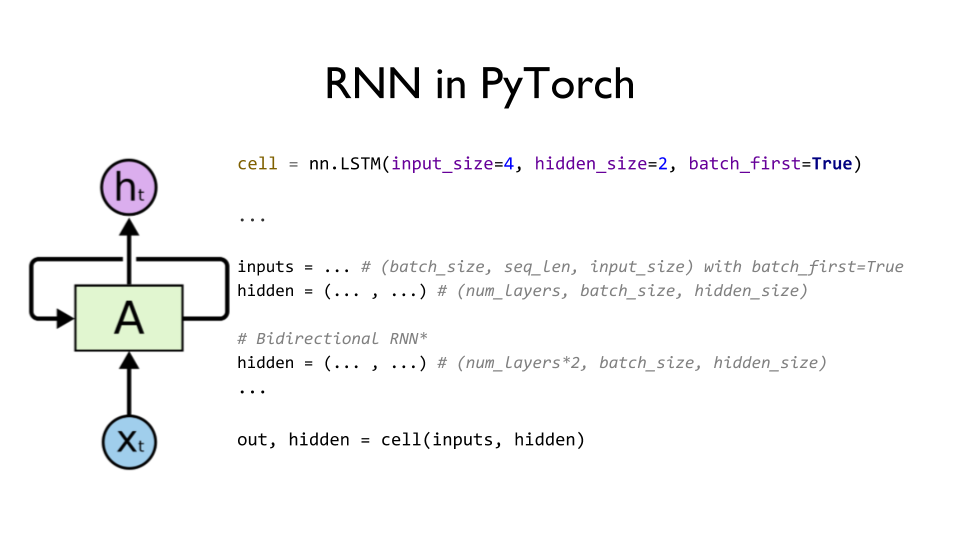

In [4]:
from IPython.display import Image
Image('rnn_basic.png')

# cell = nn.RNN(input_size = 4, hidden_size = 2, batch_first = True)

# inputs = ... # (batch_size, seq_length, input_size) with batch_first = True
# hidden = ... # (num_layers, batch_size, hidden_size)

# out, hidden = cell(inputs, hidden)

## One letter

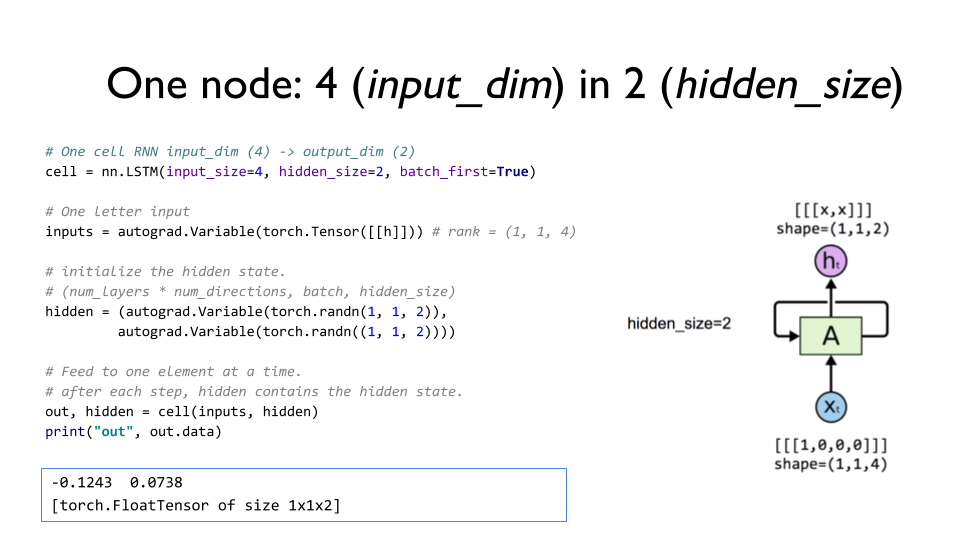

In [5]:
from IPython.display import Image
Image('rnn_hello.png')

In [6]:
# One hot encoding

h = [1,0,0,0]
e = [0,1,0,0]
l = [0,0,1,0]
o = [0,0,0,1]



In [7]:
# One cell RNN input_dim(4) -> output_dim (2)
cell_RNN = nn.RNN(input_size=4, hidden_size=2, batch_first=True)

# One letter input # (batch_size, seq_length, input_size)
inputs = Variable(torch.Tensor([[h]])) # rank = (1,1,4)

# Initialize the hidden state 
# (num_layers*num_directions, batch_size, hidden_size)
hidden = Variable(torch.rand(1,1,2))

# Feed one element at a time
# After each step, hidden contains the hidden state

out, hidden = cell_RNN(inputs, hidden)
print("out", out.data)

out tensor([[[-0.1756, -0.4052]]])


In [8]:
# One cell RNN input_dim(4) -> output_dim (2)
cell_LSTM = nn.LSTM(input_size=4, hidden_size=2, batch_first=True)

# One letter input # (batch_size, seq_length, input_size)
inputs = Variable(torch.Tensor([[h]])) # rank = (1,1,4)

# Initialize the hidden state 
# (num_layers*num_directions, batch_size, hidden_size)
hidden = (Variable(torch.rand(1,1,2)),
          Variable(torch.rand(1,1,2)))

# Feed one element at a time
# After each step, hidden contains the hidden state

out, hidden = cell_LSTM(inputs, hidden)
print("out", out.data)

out tensor([[[ 0.0348, -0.0870]]])


## Full Word (5 letters)

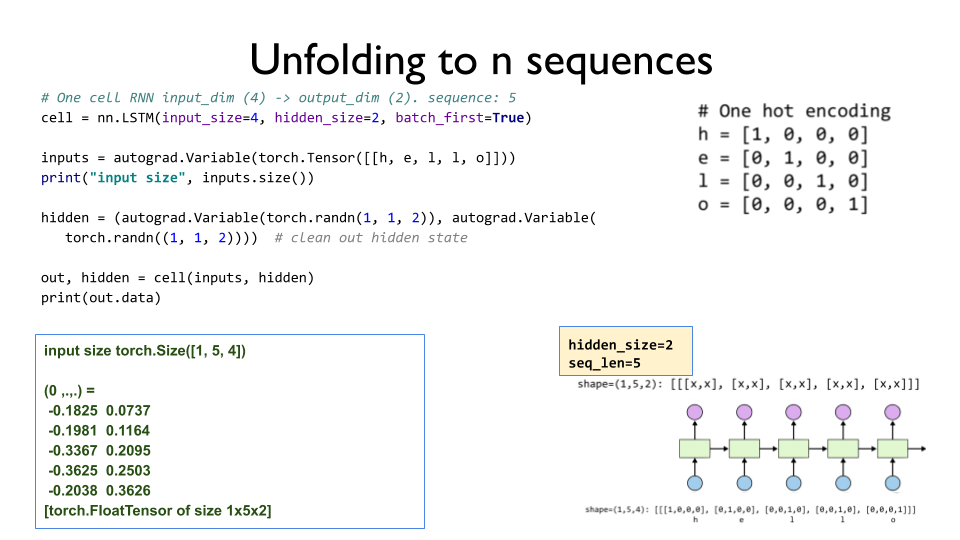

In [9]:
from IPython.display import Image
Image('rnn_unfold_code.png')

In [10]:
# One cell RNN input_dim(4) -> output_dim (2), sequence : 5
cell_RNN_seq = nn.RNN(input_size=4, hidden_size=2, batch_first=True)

# One letter input # (batch_size, seq_length, input_size)
inputs = Variable(torch.Tensor([[h, e, l, l, o]])) # rank = (1,5,4)
print("input size : ", inputs.size())

# Initialize the hidden state 
# (num_layers*num_directions, batch_size, hidden_size)
hidden = Variable(torch.rand(1,1,2))

# Feed one element at a time
# After each step, hidden contains the hidden state

out, hidden = cell_RNN_seq(inputs, hidden)
print("out", out.data)

input size :  torch.Size([1, 5, 4])
out tensor([[[ 0.2467, -0.7648],
         [ 0.0204, -0.5753],
         [ 0.1559, -0.5785],
         [ 0.2271, -0.6156],
         [-0.1172, -0.8094]]])


In [11]:
# One cell RNN input_dim(4) -> output_dim (2), sequence : 5
cell_LSTM_seq = nn.LSTM(input_size=4, hidden_size=2, batch_first=True)

# One letter input # (batch_size, seq_length, input_size)
inputs = Variable(torch.Tensor([[h, e, l, l, o]])) # rank = (1,5,4)
print("input size : ", inputs.size())
# Initialize the hidden state 
# (num_layers*num_directions, batch_size, hidden_size)
hidden = (Variable(torch.rand(1,1,2)),
          Variable(torch.rand(1,1,2)))

# Feed one element at a time
# After each step, hidden contains the hidden state

out, hidden = cell_LSTM_seq(inputs, hidden)
print("out", out.data)

input size :  torch.Size([1, 5, 4])
out tensor([[[-0.0094,  0.1665],
         [-0.0150,  0.1781],
         [ 0.0126,  0.1721],
         [ 0.0316,  0.1518],
         [ 0.0410,  0.2002]]])


## Full Word with batches

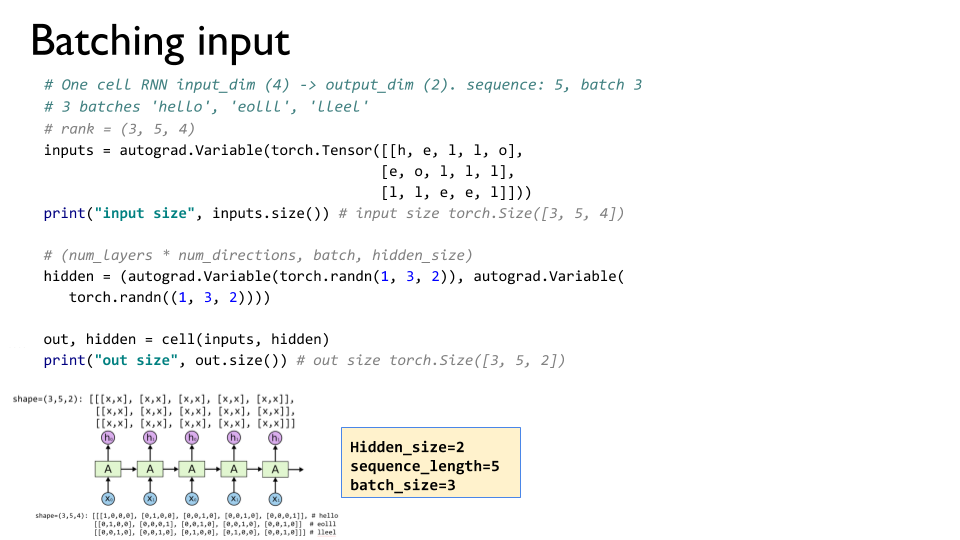

In [12]:
from IPython.display import Image
Image('rnn_batch_code.png')

In [13]:
# One cell RNN input_dim (4) -> output_dim (2) / sequence (5) / batch (3)
# 3 batches 'hello', 'eolll', 'lleel'
# rank (3,5,4)
cell_RNN_seq = nn.RNN(input_size=4, hidden_size=2, batch_first=True)

inputs = Variable(torch.Tensor([[h,e,l,l,o],
                                [e,o,l,l,l],
                                [l,l,e,e,l]]))

print("input size : ", inputs.size()) # input size torch.Size([3,5,4])

# (num_layers * num_directions, batch, hidden_size)
# if bidirectional then num_directions = 2

hidden = (Variable(torch.randn(1,3,2)))

out, hidden = cell_RNN_seq(inputs, hidden)
print("out", out.data)

input size :  torch.Size([3, 5, 4])
out tensor([[[-0.8632, -0.1696],
         [-0.4167, -0.4222],
         [-0.2349,  0.2976],
         [-0.1839, -0.1365],
         [-0.8523, -0.2578]],

        [[-0.6391, -0.7798],
         [-0.8412,  0.0807],
         [-0.0388, -0.1018],
         [-0.2946,  0.1609],
         [-0.1865, -0.0574]],

        [[-0.7532,  0.9616],
         [ 0.0662, -0.5849],
         [-0.6531, -0.0089],
         [-0.4478, -0.4770],
         [-0.2339,  0.3254]]])


## Teach RNN 'hihell' to 'ihello'

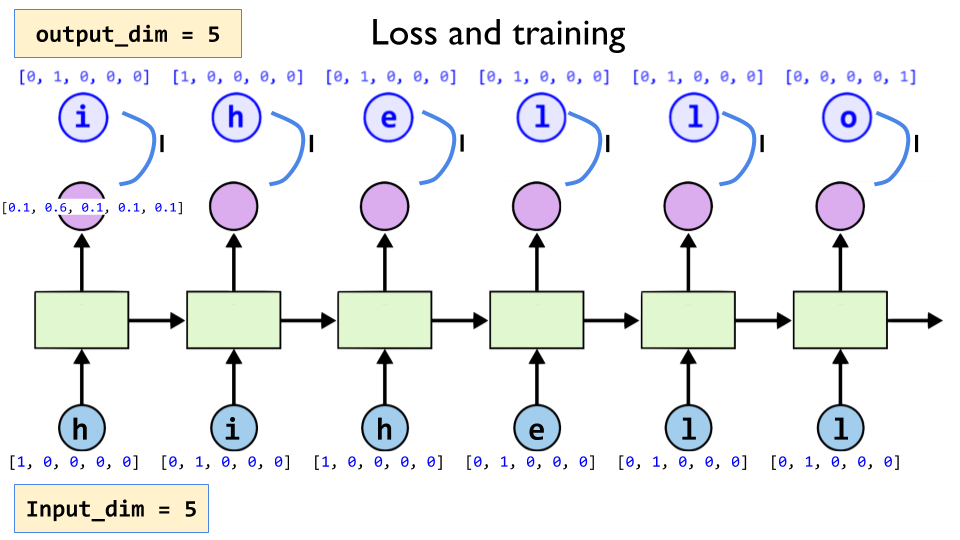

In [14]:
from IPython.display import Image
Image('rnn_teach.png')

In [15]:
idx2char = ['h', 'i', 'e', 'l', 'o']

x_data = [0,1,0,2,3,3] # hihell
one_hot_lookup = [[1,0,0,0,0], # 0
                  [0,1,0,0,0], # 1
                  [0,0,1,0,0], # 2
                  [0,0,0,1,0], # 3
                  [0,0,0,0,1]] # 4

y_data = [1,0,2,3,3,4] # ihello
x_one_hot = [one_hot_lookup[x] for x in x_data]

# As we have one batch of samples, we will change them to variables only once
inputs = Variable(torch.Tensor(x_one_hot))
labels = Variable(torch.LongTensor(y_data))


In [16]:
# @title Model Definition

class Model(nn.Module):
  def __init__(self, input_size=5, hidden_size=5, 
               batch_size=1, sequence_length=1, 
               num_layers=1, num_classes=5):
    '''
    Parameters
      
      input_size = 5 # one_hot_size
      hidden_size = 5 # output from the cell. 5 to directly predict one-hot
      batch_size = 1 # one sentence
      sequence_length = 1 # let's fo one by one
      num_layers = 1 # one-layer RNN
      num_classes = 5 # output classes
    '''
    super().__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.batch_size = batch_size
    self.sequence_length = sequence_length
    self.num_layers = num_layers
    self.num_classes = num_classes
    
    self.rnn = nn.RNN(input_size, hidden_size, batch_first= True)
    
  def forward(self, x, hidden):
    # Reshape input in (batch_size, sequence_length, input_size)
    x = x.view(self.batch_size, self.sequence_length, self.input_size)

    # Propagate input through RNN
    # Input : batch, seq_len, input_size

    out, hidden = self.rnn(x,hidden)
    out = out.view(-1,self.num_classes) # -1 makes it word length
    return hidden, out

  def init_hidden(self):
    return Variable(torch.zeros(self.num_layers, 
                                self.batch_size, 
                                self.hidden_size))

In [17]:
# Instantiate RNN Model
model = Model()
print(model)

Model(
  (rnn): RNN(5, 5, batch_first=True)
)


In [18]:
# Set loss and optimizer function
# CrossEntropyLoss = LogSoftmax + NLLLoss
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [19]:
# @title Training
for epoch in range(100):
  optimizer.zero_grad()
  loss = 0
  hidden = model.init_hidden()

  sys.stdout.write("predicted string: ")
  for input, label in zip(inputs, labels):
    hidden, output = model(input, hidden)
    val, idx = output.max(1)
    sys.stdout.write(idx2char[idx.data[0]])
    loss += criterion(output, torch.LongTensor([label]))

  print(", epoch: %d, loss: %1.3f" % (epoch + 1, loss))
  loss.backward()
  optimizer.step()

print("Learning finished!")

predicted string: lehehe, epoch: 1, loss: 10.686
predicted string: leeell, epoch: 2, loss: 9.123
predicted string: lelhll, epoch: 3, loss: 8.191
predicted string: lhlhlo, epoch: 4, loss: 7.570
predicted string: lhlhlo, epoch: 5, loss: 6.997
predicted string: lhlllo, epoch: 6, loss: 6.399
predicted string: lhello, epoch: 7, loss: 5.891
predicted string: ihello, epoch: 8, loss: 5.457
predicted string: ihello, epoch: 9, loss: 5.059
predicted string: ihello, epoch: 10, loss: 4.707
predicted string: ihello, epoch: 11, loss: 4.406
predicted string: ihello, epoch: 12, loss: 4.136
predicted string: ihello, epoch: 13, loss: 3.871
predicted string: ihello, epoch: 14, loss: 3.627
predicted string: ihello, epoch: 15, loss: 3.482
predicted string: ihello, epoch: 16, loss: 3.381
predicted string: ihello, epoch: 17, loss: 3.265
predicted string: ihello, epoch: 18, loss: 3.189
predicted string: ihello, epoch: 19, loss: 3.209
predicted string: ihello, epoch: 20, loss: 3.120
predicted string: ihello, ep

In [20]:
# Better Alternative Training
model = Model(sequence_length = 6)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
hidden = model.init_hidden()
for epoch in range(100):
  _, outputs = model(inputs, hidden)
  optimizer.zero_grad()
  loss = criterion(outputs, labels)
  loss.backward()
  optimizer.step()
  _,idx = outputs.max(1)
  idx = idx.data.numpy()
  result_str = [idx2char[c] for c in idx.squeeze()]
  print(", epoch: %d, loss: %1.3f" % (epoch + 1, loss))
  print("Predicted string : " , ''.join(result_str))

, epoch: 1, loss: 1.734
Predicted string :  oiihhh
, epoch: 2, loss: 1.449
Predicted string :  lhllll
, epoch: 3, loss: 1.333
Predicted string :  lhllll
, epoch: 4, loss: 1.207
Predicted string :  lhilll
, epoch: 5, loss: 1.092
Predicted string :  lhello
, epoch: 6, loss: 1.008
Predicted string :  ehello
, epoch: 7, loss: 0.944
Predicted string :  ehello
, epoch: 8, loss: 0.888
Predicted string :  ihello
, epoch: 9, loss: 0.843
Predicted string :  ihelio
, epoch: 10, loss: 0.804
Predicted string :  ihelio
, epoch: 11, loss: 0.772
Predicted string :  ihelio
, epoch: 12, loss: 0.744
Predicted string :  ihelio
, epoch: 13, loss: 0.717
Predicted string :  ihelio
, epoch: 14, loss: 0.692
Predicted string :  ihelio
, epoch: 15, loss: 0.670
Predicted string :  ihelio
, epoch: 16, loss: 0.652
Predicted string :  ihelio
, epoch: 17, loss: 0.638
Predicted string :  ihelio
, epoch: 18, loss: 0.621
Predicted string :  ihelio
, epoch: 19, loss: 0.603
Predicted string :  ihello
, epoch: 20, loss: 0.